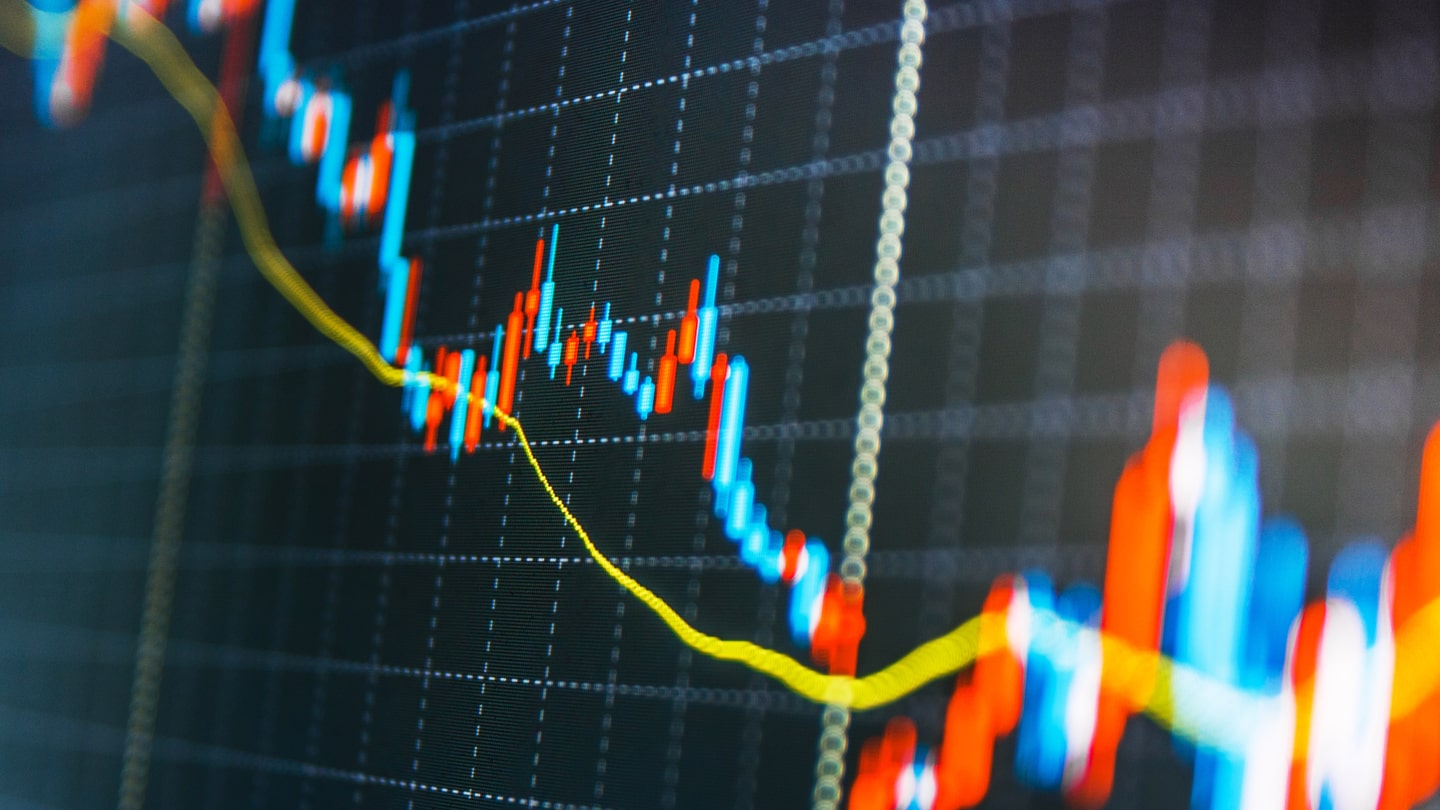

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [2]:
from nsepy import get_history
nifty = get_history(symbol="NIFTY",
                    start=date(2000,1,1),
                    end=date.today(),
                    index=True)
nifty.tail()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2022-05-23,16290.95,16414.70,16185.75,16214.70,293829853,2.511085e+11
2022-05-24,16225.55,16262.80,16078.60,16125.15,249778296,2.189575e+11
2022-05-25,16196.35,16223.35,16006.95,16025.80,243342347,2.140014e+11
2022-05-26,16105.00,16204.45,15903.70,16170.15,314305739,2.772121e+11
2022-05-27,16296.60,16370.60,16221.95,16352.45,274064956,2.134198e+11


In [3]:
from nsepy import get_index_pe_history
nifty_pe = get_index_pe_history(symbol="NIFTY",
                                start=date(2000,1,1),
                                end=date.today())
nifty_pe.tail()

,P/E,P/B,Div Yield
Date,,,
2022-05-24,19.87,4.12,1.32
2022-05-25,19.74,4.09,1.38
2022-05-26,19.88,4.13,1.44
2022-05-27,20.27,4.18,1.43
2022-05-30,20.65,4.26,1.40


In [4]:
nifty.shape, nifty_pe.shape

((5573, 6), (5574, 3))

## Merge both the dataframe

In [5]:
nifty=pd.merge(nifty, nifty_pe, left_index=True, right_index=True)
nifty.tail()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2022-05-23,16290.95,16414.70,16185.75,16214.70,293829853,2.511085e+11,20.01,4.14,1.32
2022-05-24,16225.55,16262.80,16078.60,16125.15,249778296,2.189575e+11,19.87,4.12,1.32
2022-05-25,16196.35,16223.35,16006.95,16025.80,243342347,2.140014e+11,19.74,4.09,1.38
2022-05-26,16105.00,16204.45,15903.70,16170.15,314305739,2.772121e+11,19.88,4.13,1.44
2022-05-27,16296.60,16370.60,16221.95,16352.45,274064956,2.134198e+11,20.27,4.18,1.43


In [6]:
nifty.shape

(5573, 9)

In [7]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5573 entries, 2000-01-03 to 2022-05-27
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5573 non-null   float64
 1   High       5573 non-null   float64
 2   Low        5573 non-null   float64
 3   Close      5573 non-null   float64
 4   Volume     5573 non-null   int64  
 5   Turnover   5573 non-null   float64
 6   P/E        5573 non-null   float64
 7   P/B        5573 non-null   float64
 8   Div Yield  5573 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 435.4+ KB


In [8]:
type(nifty.index)

pandas.core.indexes.base.Index

In [9]:
nifty.index=pd.to_datetime(nifty.index)
nifty.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
               '2022-05-20', '2022-05-23', '2022-05-24', '2022-05-25',
               '2022-05-26', '2022-05-27'],
              dtype='datetime64[ns]', name='Date', length=5573, freq=None)

In [10]:
type(nifty.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
nifty.isnull().any()

Open         False
High         False
Low          False
Close        False
Volume       False
Turnover     False
P/E          False
P/B          False
Div Yield    False
dtype: bool

#### Get particular day Data

In [12]:
nifty.loc['2022-01-21']

Open         1.761370e+04
High         1.770760e+04
Low          1.748585e+04
Close        1.761715e+04
Volume       2.776454e+08
Turnover     2.594164e+11
P/E          2.429000e+01
P/B          4.440000e+00
Div Yield    1.180000e+00
Name: 2022-01-21 00:00:00, dtype: float64

#### Get Particular Month data

In [13]:
nifty.loc['2022-01'].head()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2022-01-03,17387.15,17646.65,17383.30,17625.70,200456430,1.618136e+11,24.49,4.44,1.17
2022-01-04,17681.40,17827.60,17593.55,17805.25,247437472,1.860416e+11,24.74,4.49,1.16
2022-01-05,17820.10,17944.70,17748.85,17925.25,251460038,2.373731e+11,24.91,4.52,1.15
2022-01-06,17768.50,17797.95,17655.55,17745.90,236454824,2.264382e+11,24.66,4.47,1.16
2022-01-07,17797.60,17905.00,17704.55,17812.70,239338015,2.144789e+11,24.75,4.49,1.16


<h4 <h3 style="color:red">(2) Select Date Range</h4>

In [14]:
nifty['2022-01-01':'2022-03-01'].head(2)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2022-01-03,17387.15,17646.65,17383.30,17625.70,200456430,1.618136e+11,24.49,4.44,1.17
2022-01-04,17681.40,17827.60,17593.55,17805.25,247437472,1.860416e+11,24.74,4.49,1.16


In [15]:
nifty.loc['2022-01-01':'2022-03-01'].head(2)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2022-01-03,17387.15,17646.65,17383.30,17625.70,200456430,1.618136e+11,24.49,4.44,1.17
2022-01-04,17681.40,17827.60,17593.55,17805.25,247437472,1.860416e+11,24.74,4.49,1.16


In [16]:
nifty.sort_index().loc['2022-01-01':'2022-03-01'].head(2)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2022-01-03,17387.15,17646.65,17383.30,17625.70,200456430,1.618136e+11,24.49,4.44,1.17
2022-01-04,17681.40,17827.60,17593.55,17805.25,247437472,1.860416e+11,24.74,4.49,1.16


<h3 style="color:#FF9933">Resampling</h3>

In [17]:
nifty.resample('M').mean().tail()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2022-01-31,17768.150000,17866.765000,17635.905000,17770.622500,2.717724e+08,2.446869e+11,24.511000,4.477500,1.162500
2022-02-28,17226.812500,17350.477500,17073.355000,17225.940000,2.810146e+08,2.341222e+11,22.517000,4.340000,1.238000
2022-03-31,16854.978571,16965.361905,16716.866667,16864.673810,3.790337e+08,2.863980e+11,21.703810,4.252381,1.230476
2022-04-30,17431.784211,17526.439474,17313.818421,17419.360526,2.978025e+08,2.601742e+11,22.727368,4.450000,1.138421
2022-05-31,16273.031579,16384.907895,16124.747368,16233.971053,2.863316e+08,2.351565e+11,20.303158,4.147368,1.295789


In [18]:
nifty.resample('y').mean().tail()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2018-12-31,10758.260366,10801.753252,10695.351423,10749.392276,2.746934e+08,1.438673e+11,26.411951,3.559553,1.198862
2019-12-31,11444.261837,11494.463061,11370.888367,11432.632245,4.832819e+08,1.901718e+11,27.692980,3.574816,1.250531
2020-12-31,11175.607540,11254.578373,11066.116468,11161.474802,6.609620e+08,3.083053e+11,28.577619,3.172778,1.428333
2021-12-31,16042.683871,16118.128226,15929.441331,16026.760685,4.233280e+08,2.892710e+11,30.612621,4.289234,1.100363
2022-12-31,17113.588889,17221.545960,16975.476263,17106.087879,3.041818e+08,2.525437e+11,22.362828,4.333333,1.213131


In [19]:
nifty.resample('Q').mean().tail()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2021-06-30,15141.482787,15213.813115,15041.886066,15138.927869,4.588356e+08,3.125491e+11,30.513115,4.288525,1.052131
2021-09-30,16580.280159,16646.758730,16504.404762,16587.390476,3.063832e+08,2.375945e+11,27.013968,4.288571,1.115397
2021-12-31,17654.984921,17733.283333,17515.744444,17615.721429,3.016470e+08,2.391393e+11,25.272222,4.410794,1.152857
2022-03-31,17276.291803,17387.171311,17135.072131,17280.154098,3.117287e+08,2.555826e+11,22.890820,4.354918,1.210656
2022-06-30,16852.407895,16955.673684,16719.282895,16826.665789,2.920671e+08,2.476654e+11,21.515263,4.298684,1.217105


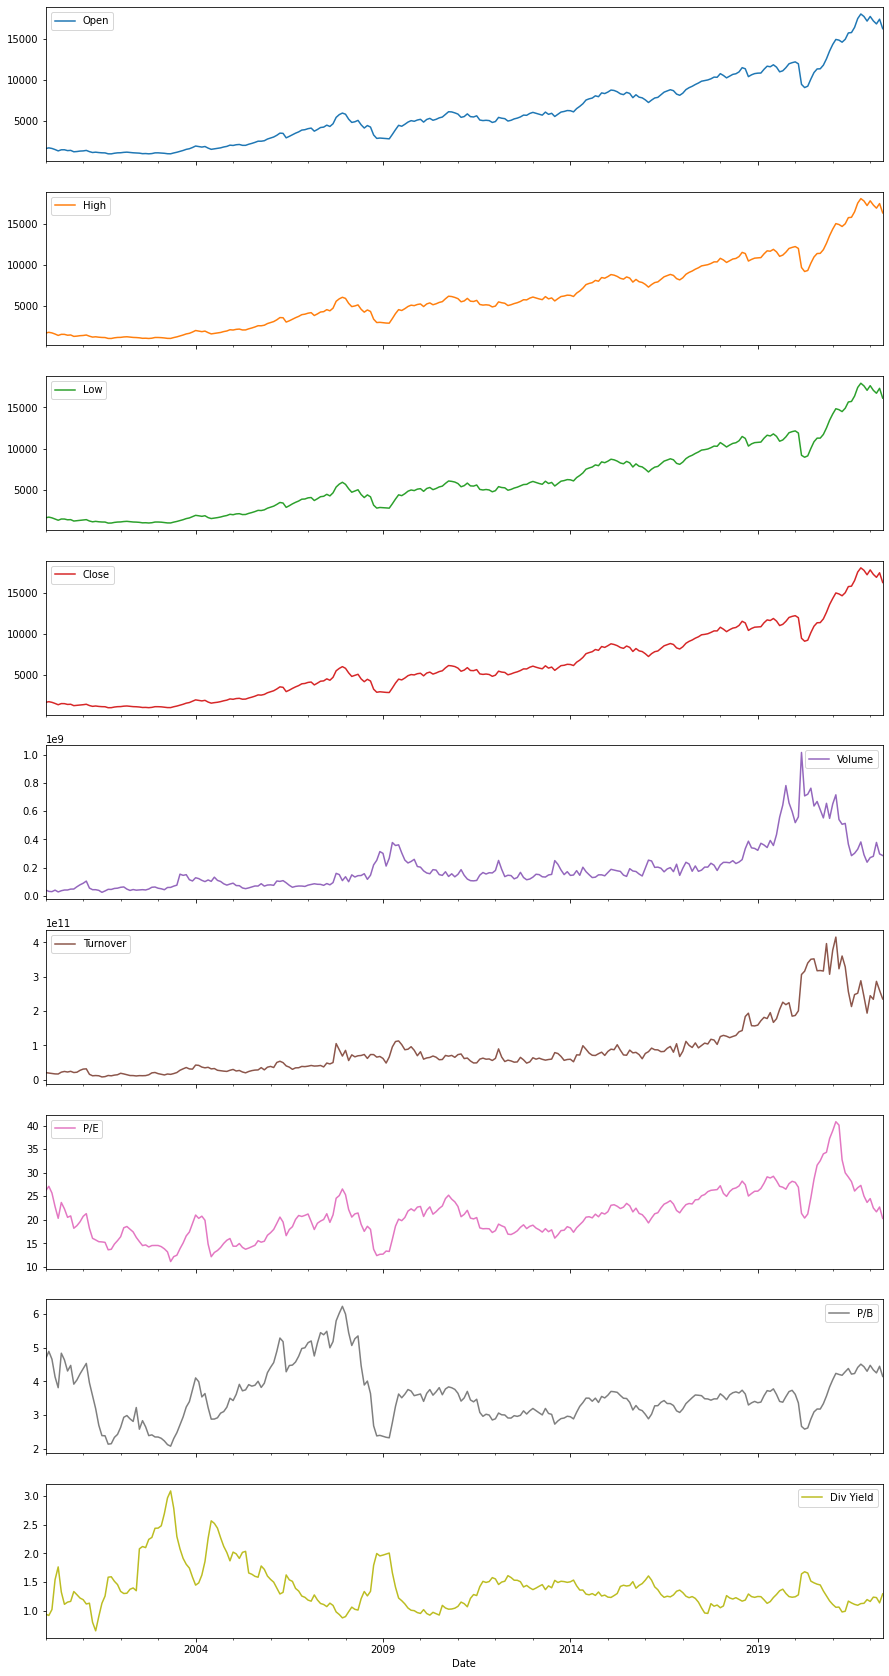

In [20]:
nifty.resample('M').mean().plot(subplots=True, figsize=(15, 30))
plt.show()

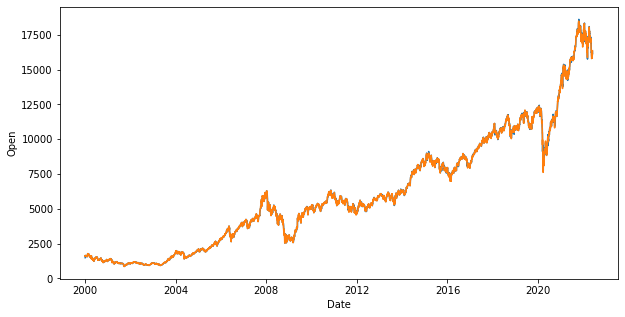

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(x = nifty.index, y = 'Open', data = nifty)
sns.lineplot(x = nifty.index, y = 'Close', data = nifty)
plt.show()

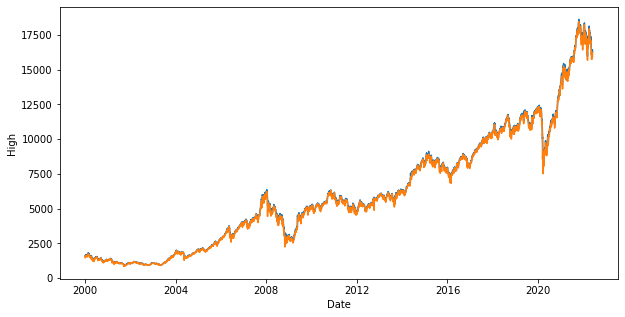

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(x = nifty.index, y = 'High', data = nifty)
sns.lineplot(x = nifty.index, y = 'Low', data = nifty)
plt.show()

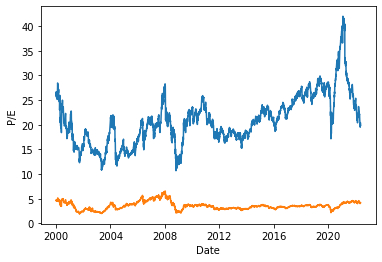

In [23]:
sns.lineplot(x = nifty.index, y = 'P/E', data = nifty)
sns.lineplot(x = nifty.index, y = 'P/B', data = nifty)
plt.show()

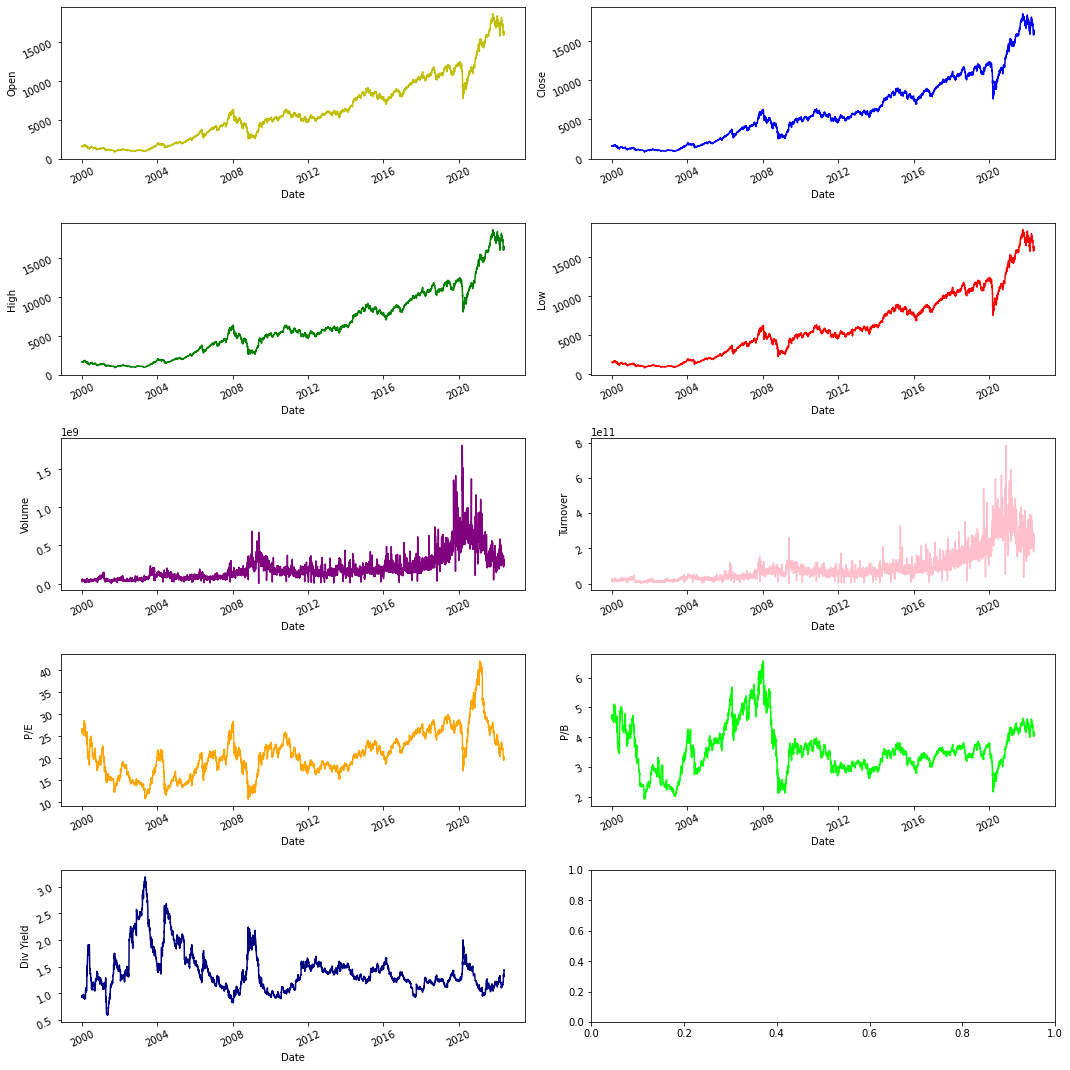

In [24]:
# create the time series subplots
fig,ax =  plt.subplots( 5, 2, figsize = ( 15, 15))
  
sns.lineplot( x = nifty.index, y = "Open", color = 'y', data = nifty, ax = ax[0][0]) 
ax[0][0].tick_params(labelrotation = 25)

sns.lineplot( x = nifty.index, y = "Close", color = 'b', data = nifty, ax = ax[0][1]) 
ax[0][1].tick_params(labelrotation = 25)

sns.lineplot( x = nifty.index, y = "High", color = 'g', data = nifty, ax = ax[1][0])  
ax[1][0].tick_params(labelrotation = 25)

sns.lineplot( x = nifty.index, y = "Low", color = 'r', data = nifty, ax = ax[1][1])   
ax[1][1].tick_params(labelrotation = 25)

sns.lineplot( x = nifty.index, y = "Volume", color = 'purple', data = nifty, ax = ax[2][0])  
ax[2][0].tick_params(labelrotation = 25)

sns.lineplot( x = nifty.index, y = "Turnover", color = 'pink', data = nifty, ax = ax[2][1])   
ax[2][1].tick_params(labelrotation = 25)

sns.lineplot( x = nifty.index, y = "P/E", color = 'Orange', data = nifty, ax = ax[3][0])  
ax[3][0].tick_params(labelrotation = 25)

sns.lineplot( x = nifty.index, y = "P/B", color = 'Lime', data = nifty, ax = ax[3][1])   
ax[3][1].tick_params(labelrotation = 25)

sns.lineplot( x = nifty.index, y = "Div Yield", color = 'Navy', data = nifty, ax = ax[4][0])   
ax[4][0].tick_params(labelrotation = 25)

fig.tight_layout(pad = 1.2)

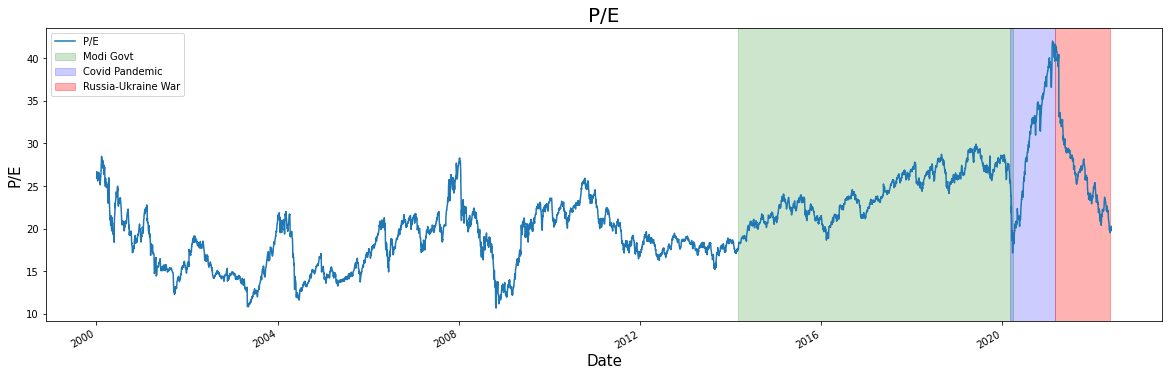

In [30]:
ax = nifty['P/E'].plot(figsize=(20,6))

ax.axvspan('2014-03-01','2020-03-30', color='green',label='Modi Govt', alpha=0.2)
ax.axvspan('2020-03-01','2021-02-28', color='blue', label='Covid Pandemic',alpha=0.2)
ax.axvspan('2021-03-01','2022-05-18', color='red',label='Russia-Ukraine War', alpha=0.3)
plt.legend()
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('P/E', fontsize=15)
ax.set_title('P/E',fontsize=20)
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(nifty['P/E'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.9809172189468303
p-value: 0.03671533151637168
Critical Values:
	1%: -3.4315285852166277
	5%: -2.8620608185993297
	10%: -2.5670472304152314


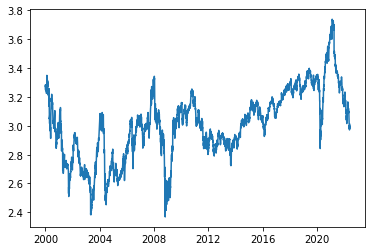

In [26]:
df_log = np.log(nifty[['P/E']])
plt.plot(df_log)
plt.show()

In [27]:
df_log.head()

,P/E
Date,
2000-01-03,3.254629
2000-01-04,3.283539
2000-01-05,3.256942
2000-01-06,3.270329
2000-01-07,3.267666
